In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

# Sweden Data

In [113]:
seasonal_adj_unemp_rate = pd.read_excel('Sweden/seasonally_adjusted_unemployment_rate.xlsx', index_col=0)
smoothed_seasonal_adj_unemp_rate = pd.read_excel('Sweden/smoothed_seasonally_adjusted_unemployment_rate.xlsx', index_col=0)
non_seasonal_adj_unemp_rate = pd.read_excel('Sweden/non_seasonally_adjusted_unemployment_rate.xlsx', index_col=0)

In [114]:
join_df=seasonal_adj_unemp_rate.transpose()
join_df['Smoothed_SA_Unemployment rate, percent']=smoothed_seasonal_adj_unemp_rate.transpose()
join_df['NSA_Unemployment rate, percent']=non_seasonal_adj_unemp_rate.transpose()
join_df['date']=pd.date_range(start='1/1/2013', periods=len(join_df), freq='M')
join_df=join_df.set_index('date')

In [115]:
join_df

,"SA_Unemployment rate, percent","Smoothed_SA_Unemployment rate, percent","NSA_Unemployment rate, percent"
date,,,
2013-01-31,7.9,8.1,8.4
2013-02-28,8.0,8.1,8.5
2013-03-31,8.3,8.1,8.8
2013-04-30,8.2,8.1,8.7
2013-05-31,7.9,8.0,8.2
...,...,...,...
2019-11-30,7.3,7.0,6.8
2019-12-31,6.6,7.0,6.0
2020-01-31,7.2,7.0,7.5


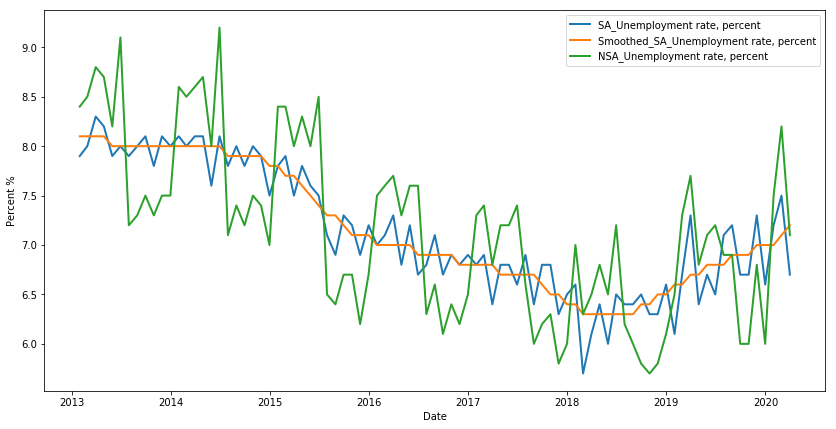

In [116]:
fig=plt.figure(figsize=(14,7))

plt.plot(join_df['SA_Unemployment rate, percent'],label='SA_Unemployment rate, percent', lw=2)
plt.plot(join_df['Smoothed_SA_Unemployment rate, percent'],label='Smoothed_SA_Unemployment rate, percent', lw=2)
plt.plot(join_df['NSA_Unemployment rate, percent'],label='NSA_Unemployment rate, percent', lw=2)


plt.xlabel('Date')
plt.ylabel('Percent %')

plt.legend()

plt.show()

# Decomposing the time series (Non seasonal adjusted)

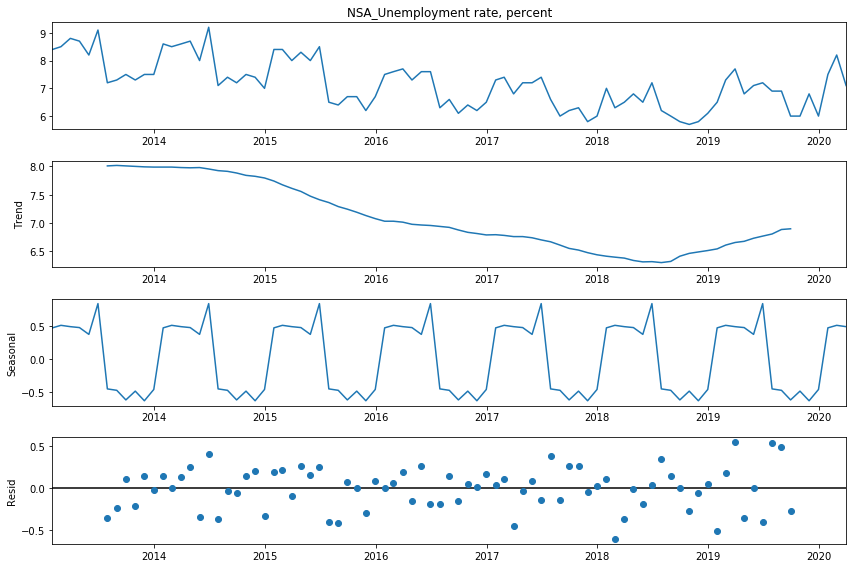

In [117]:
rcParams['figure.figsize'] = (12, 8)
lw=1
decomposition = seasonal_decompose(join_df['NSA_Unemployment rate, percent'], model='additive')
decomposition.plot()

plt.show()

In [58]:
seasonal_adjusted_NSA_unemploymnet = join_df['NSA_Unemployment rate, percent']-decomposition.seasonal
seasonal_adjusted_NSA_unemploymnet

date
2013-01-31    7.931564
2013-02-28    7.993370
2013-03-31    8.313509
2013-04-30    8.227397
2013-05-31    7.830175
                ...   
2019-11-30    7.434342
2019-12-31    6.463509
2020-01-31    7.031564
2020-02-29    7.693370
2020-03-31    6.613509
Length: 87, dtype: float64

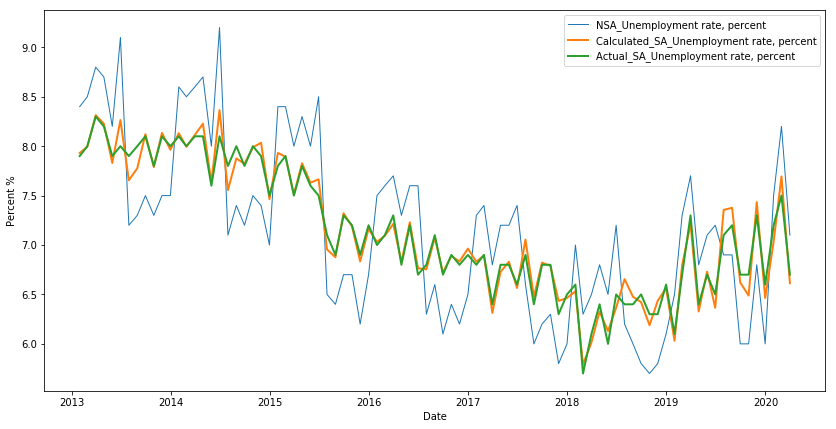

In [62]:
fig=plt.figure(figsize=(14,7))

plt.plot(join_df['NSA_Unemployment rate, percent'],label='NSA_Unemployment rate, percent', lw=1)
plt.plot(seasonal_adjusted_NSA_unemploymnet,label='Calculated_SA_Unemployment rate, percent', lw=2)
plt.plot(join_df['SA_Unemployment rate, percent'],label='Actual_SA_Unemployment rate, percent', lw=2)

plt.xlabel('Date')
plt.ylabel('Percent %')

plt.legend()

plt.show()

# USA

In [129]:
data_df=pd.read_excel('USA/USA_weekly_claims_SA_and_NSA.xlsx',sheet_name='Sheet2', index_col=0)
#data_df['date']=pd.date_range(start='1/7/1967', periods=len(data_df), freq='W')
data_df['date']=pd.date_range(start='1/2/2010', periods=len(data_df), freq='W')
data_df=data_df.iloc[:-2]
data_df=data_df.set_index('date')

In [130]:
data_df

,Initial Claims N.S.A,Initial Claims S.A.,Continued Claims N.S.A,Continued Claims S.A.
date,,,,
2010-01-03,646219,391000,4109127,3421000
2010-01-10,525422,367000,4069651,3511000
2010-01-17,416880,381000,4058236,3419000
2010-01-24,422287,372000,4097013,3454000
2010-01-31,401365,368000,3984889,3391000
...,...,...,...,...
2018-02-11,209336,215000,2061669,1693000
2018-02-18,199278,220000,2105457,1720000
2018-02-25,216982,217000,2057280,1699000


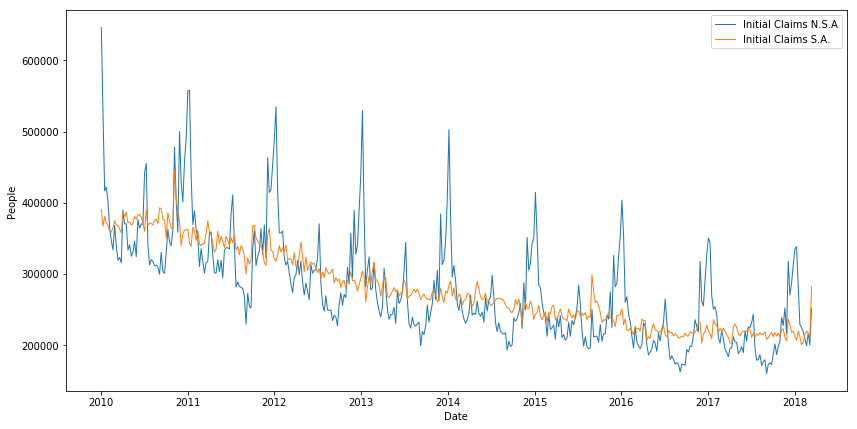

In [131]:
fig=plt.figure(figsize=(14,7))

plt.plot(data_df['Initial Claims N.S.A'],label='Initial Claims N.S.A', lw=1)
plt.plot(data_df['Initial Claims S.A.'],label='Initial Claims S.A.', lw=1)

plt.xlabel('Date')
plt.ylabel('People')

plt.legend()

plt.show()

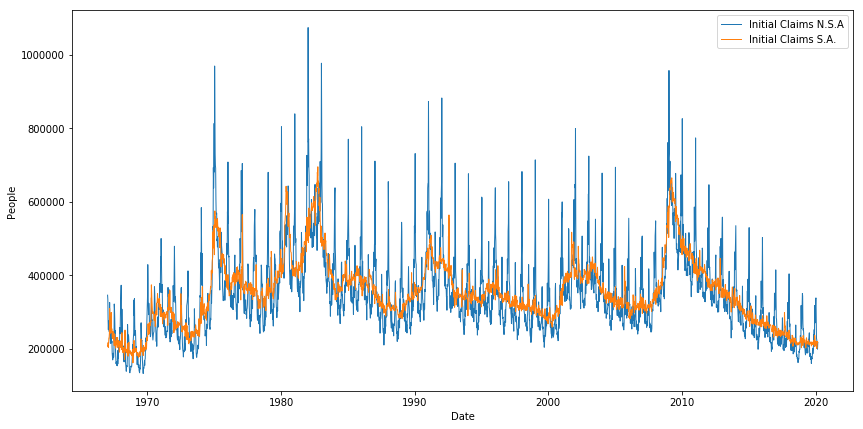

In [98]:
fig=plt.figure(figsize=(14,7))

plt.plot(data_df['Initial Claims N.S.A'],label='Initial Claims N.S.A', lw=1)
plt.plot(data_df['Initial Claims S.A.'],label='Initial Claims S.A.', lw=1)

plt.xlabel('Date')
plt.ylabel('People')

plt.legend()

plt.show()

In [132]:
data_monthly_df=data_df.resample('M').mean()
data_monthly_df

,Initial Claims N.S.A,Initial Claims S.A.,Continued Claims N.S.A,Continued Claims S.A.
date,,,,
2010-01-31,482434.60,375800.0,4063783.20,3439200.0
2010-02-28,353587.00,365000.0,3936058.75,3375750.0
2010-03-31,324693.25,364500.0,3655467.25,3329250.0
2010-04-30,366163.50,381750.0,3344157.75,3323000.0
2010-05-31,333449.20,374200.0,3097680.60,3327800.0
...,...,...,...,...
2017-11-30,234035.75,215500.0,1567166.00,1689750.0
2017-12-31,304732.00,223200.0,1939912.20,1740600.0
2018-01-31,268576.00,210000.0,2115223.75,1717500.0


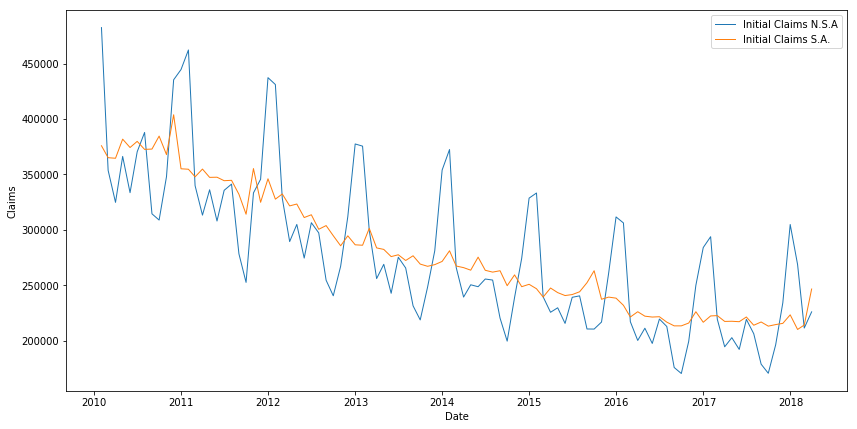

In [133]:
fig=plt.figure(figsize=(14,7))

plt.plot(data_monthly_df['Initial Claims N.S.A'],label='Initial Claims N.S.A', lw=1)
plt.plot(data_monthly_df['Initial Claims S.A.'],label='Initial Claims S.A.', lw=1)

plt.xlabel('Date')
plt.ylabel('Claims')

plt.legend()

plt.show()

# Decomposing the time series (Non seasonal adjusted)

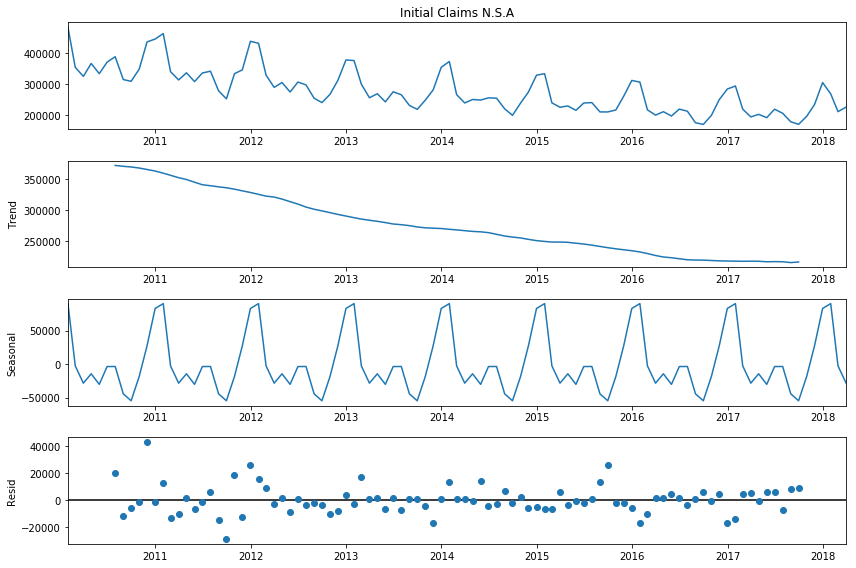

In [134]:
rcParams['figure.figsize'] = (12, 8)
lw=1
decomposition_US_monthly = seasonal_decompose(data_monthly_df['Initial Claims N.S.A'], model='additive')
decomposition_US_monthly.plot()

plt.show()

In [135]:
seasonal_adjusted_NSA_claims_month = data_monthly_df['Initial Claims N.S.A']-decomposition_US_monthly.seasonal
seasonal_adjusted_NSA_claims_month

date
2010-01-31    392065.527300
2010-02-28    356277.880872
2010-03-31    353162.628193
2010-04-30    380666.750812
2010-05-31    363691.857955
                  ...      
2017-11-30    206733.740693
2017-12-31    221625.390693
2018-01-31    178206.927300
2018-02-28    213990.130872
2018-03-31    254368.378193
Freq: M, Length: 99, dtype: float64

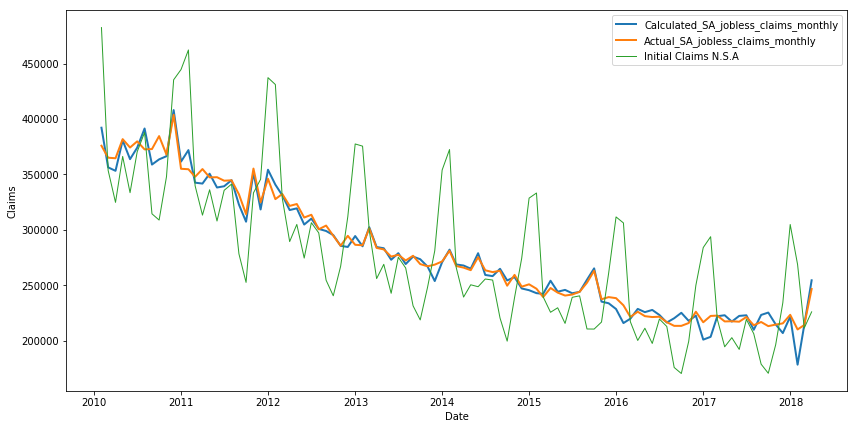

In [136]:
fig=plt.figure(figsize=(14,7))

plt.plot(seasonal_adjusted_NSA_claims_month,label='Calculated_SA_jobless_claims_monthly', lw=2)
plt.plot(data_monthly_df['Initial Claims S.A.'],label='Actual_SA_jobless_claims_monthly', lw=2)
plt.plot(data_monthly_df['Initial Claims N.S.A'],label='Initial Claims N.S.A', lw=1)

plt.xlabel('Date')
plt.ylabel('Claims')

plt.legend()

plt.show()

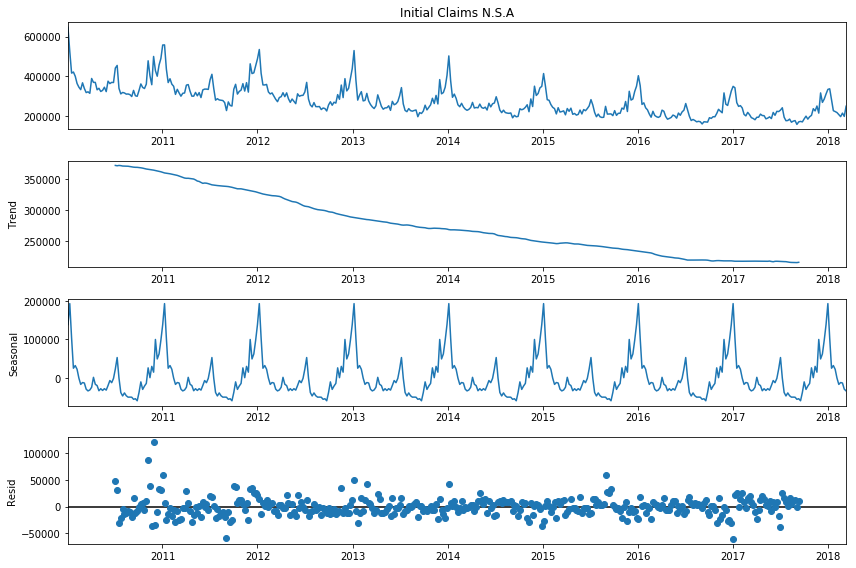

In [137]:
rcParams['figure.figsize'] = (12, 8)
lw=1
decomposition_US_weekly = seasonal_decompose(data_df['Initial Claims N.S.A'], model='additive')
decomposition_US_weekly.plot()

plt.show()

In [138]:
seasonal_adjusted_NSA_claims_weekly = data_df['Initial Claims N.S.A']-decomposition_US_weekly.seasonal
seasonal_adjusted_NSA_claims_weekly

date
2010-01-03    507620.341594
2010-01-10    332669.863572
2010-01-17    313403.292143
2010-01-24    396791.165770
2010-01-31    368976.661649
                  ...      
2018-02-11    225765.961099
2018-02-18    210778.969341
2018-02-25    229742.602583
2018-03-04    229119.804506
2018-03-11    284667.805880
Length: 428, dtype: float64

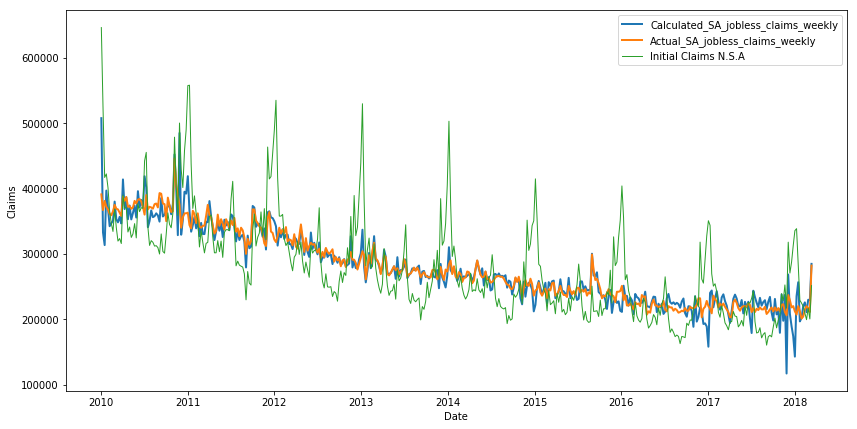

In [139]:
fig=plt.figure(figsize=(14,7))

plt.plot(seasonal_adjusted_NSA_claims_weekly,label='Calculated_SA_jobless_claims_weekly', lw=2)
plt.plot(data_df['Initial Claims S.A.'],label='Actual_SA_jobless_claims_weekly', lw=2)
plt.plot(data_df['Initial Claims N.S.A'],label='Initial Claims N.S.A', lw=1)

plt.xlabel('Date')
plt.ylabel('Claims')

plt.legend()

plt.show()